In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ml_project/telecom_data.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

## 1. EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [5]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

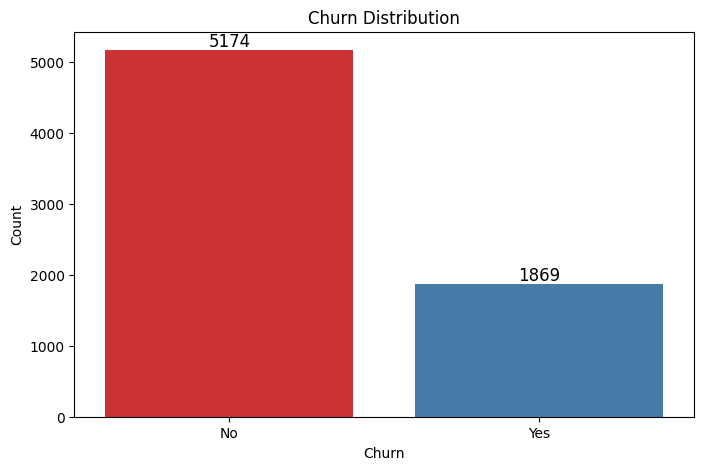

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

churn_cnt = df['Churn'].value_counts()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Churn', palette='Set1')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')

for i, count in enumerate(churn_cnt):
  plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.show()

=> 불균형 확인

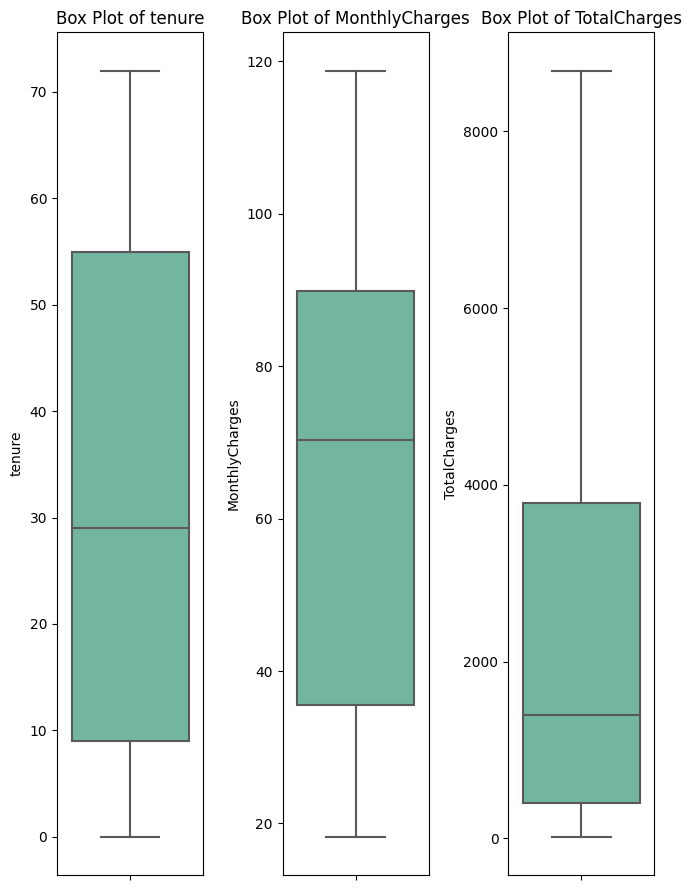

In [7]:
cont = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(9,9))
for i, var in enumerate(cont, 1):
  plt.subplot(1,4,i)
  sns.boxplot(data=df, y=var, palette='Set2')
  plt.title(f'Box Plot of {var}')

plt.tight_layout()
plt.show()

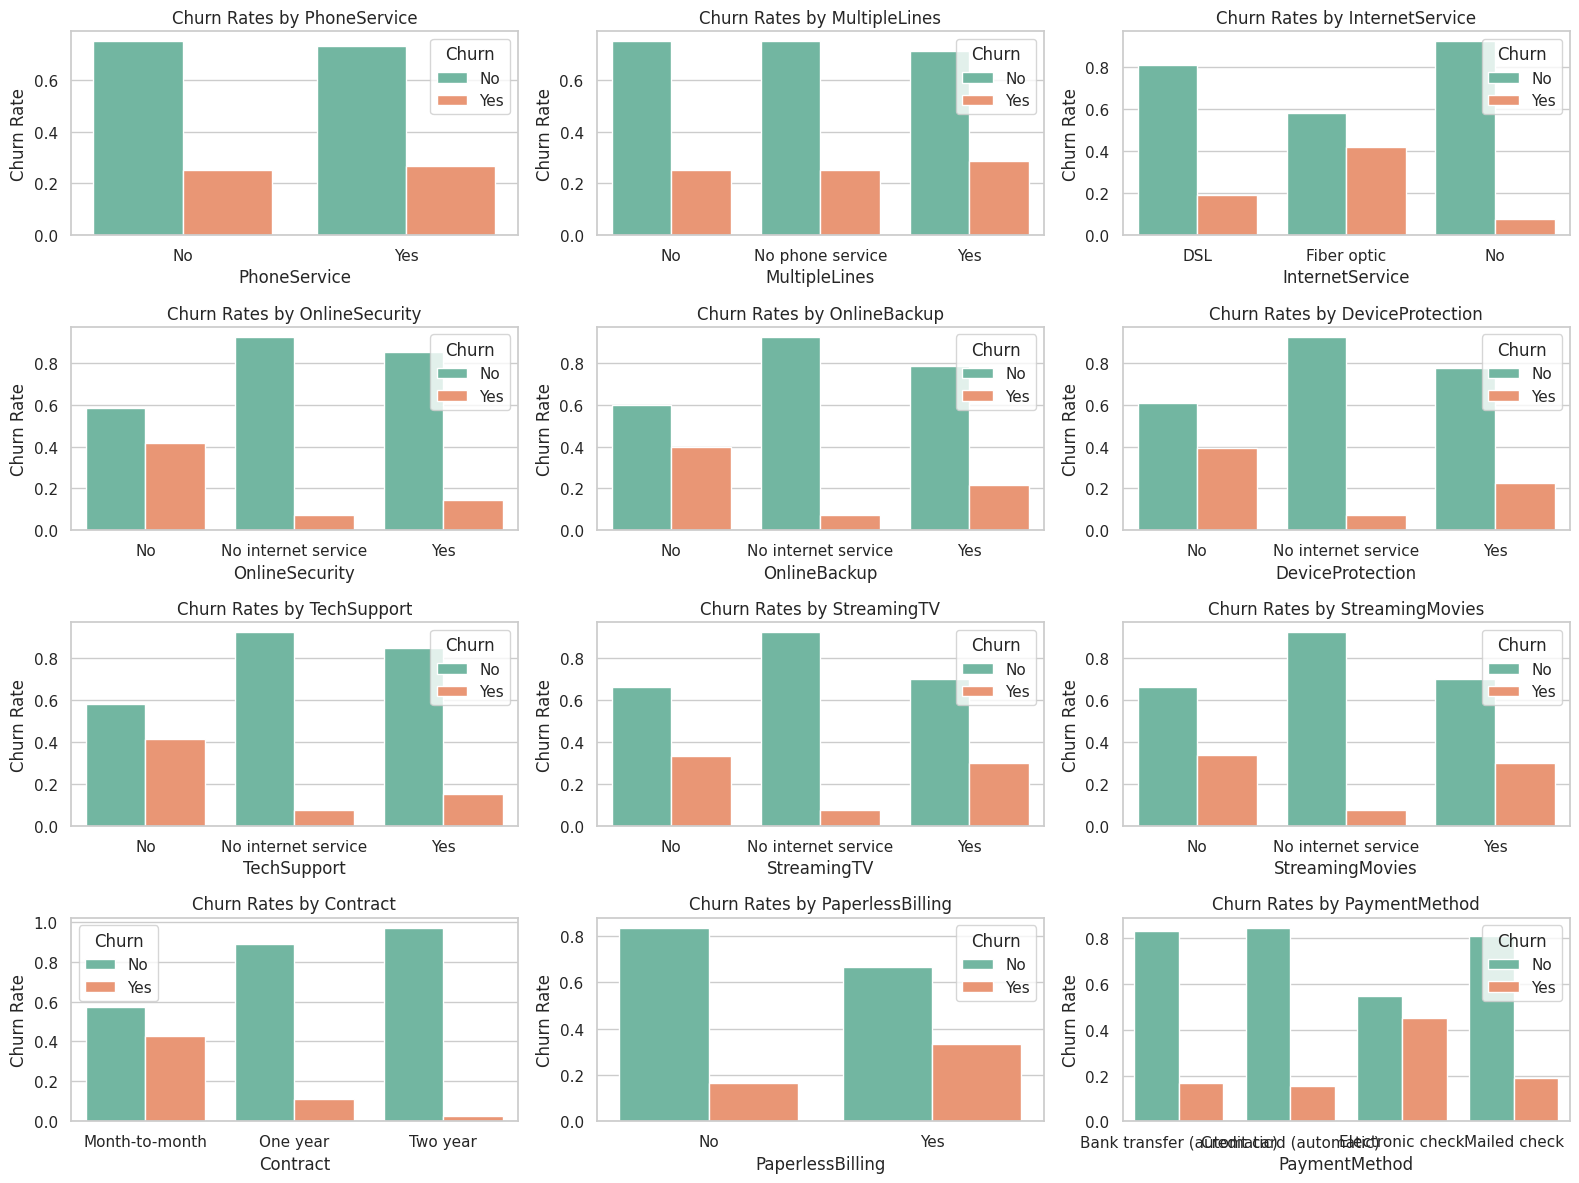

In [8]:
# 서비스 변수들
cat = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# 각 변수에 따른 이탈률 계산
churn_rates = []
for var in cat:
    var_churn_rate = df.groupby([var, 'Churn']).size() / df.groupby(var).size()
    churn_rates.append(var_churn_rate.reset_index(name='ChurnRate'))

plt.figure(figsize=(16, 12))
sns.set(style="whitegrid")

for i, var in enumerate(cat):
    plt.subplot(4, 3, i + 1)
    ax = sns.barplot(data=churn_rates[i], x=var, y='ChurnRate', hue='Churn', palette='Set2')
    ax.set_title(f'Churn Rates by {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Churn Rate')

plt.tight_layout()
plt.show()


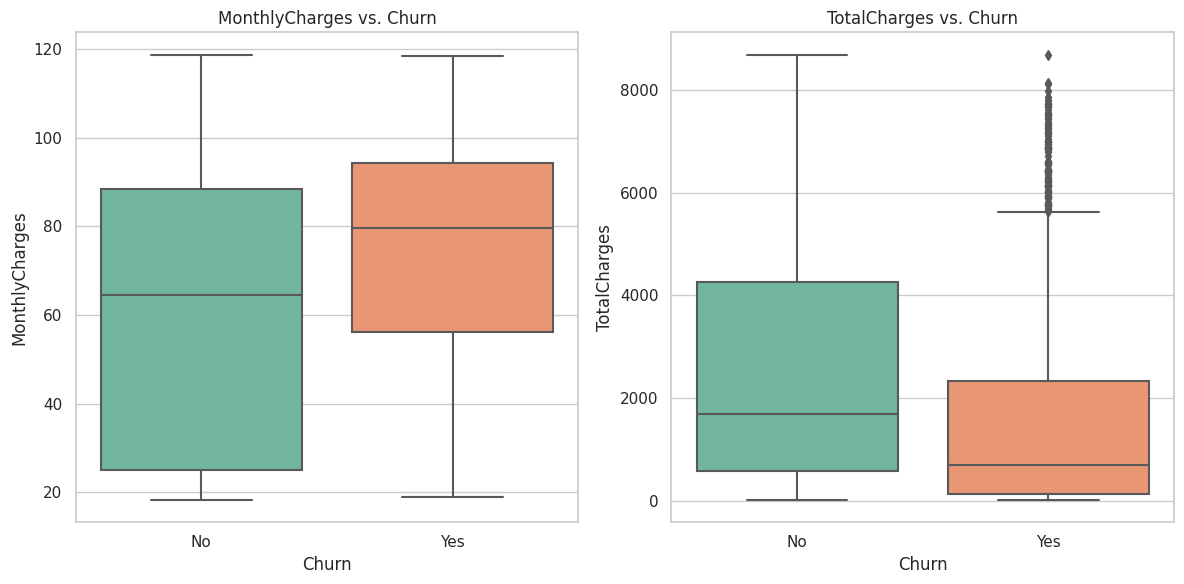

In [9]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# 월간 요금에 따른 이탈률
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set2')
plt.title('MonthlyCharges vs. Churn')
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')

# 총 요금에 따른 이탈률
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='TotalCharges', palette='Set2')
plt.title('TotalCharges vs. Churn')
plt.xlabel('Churn')
plt.ylabel('TotalCharges')

plt.tight_layout()
plt.show()

## 2. 전처리

In [10]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
miss_row = df[df['TotalCharges'].isna()]

print(miss_row)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

=> tenure인 가입 개월수가 1개월도 채 안된 0개월인 고객이므로 제거한다.

In [12]:
df.dropna(inplace=True)

범주형 변수 변환

In [13]:
# 이 방법 대신 변수 선택 사용
"""
# No Internet Service
df.loc[df['InternetService']=='No', ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']] = 'No'

# No Phone Service
df.loc[df['PhoneService']=='No', 'MultipleLines'] = 'No'
"""

"\n# No Internet Service\ndf.loc[df['InternetService']=='No', ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']] = 'No'\n\n# No Phone Service\ndf.loc[df['PhoneService']=='No', 'MultipleLines'] = 'No'\n"

In [14]:
# Yes, No로만 이루어진 변수 확인
bin_vars = []
for col in df.columns:
  if set(df[col].unique())=={'Yes','No'}:
    bin_vars.append(col)

print(bin_vars)

['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


In [15]:
for var in bin_vars:
  df[var] = df[var].map({'Yes':1, 'No':0})

df['gender'] = df['gender'].map({'Male':0, 'Female':1})

In [16]:
df.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       1              0        1           0       1   
1  5575-GNVDE       0              0        0           0      34   
2  3668-QPYBK       0              0        0           0       2   
3  7795-CFOCW       0              0        0           0      45   
4  9237-HQITU       1              0        0           0       2   

   PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             0  No phone service             DSL             No  ...   
1             1                No             DSL            Yes  ...   
2             1                No             DSL            Yes  ...   
3             0  No phone service             DSL            Yes  ...   
4             1                No     Fiber optic             No  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                1           Electronic check          29.85         29.85   
1                0               Mailed check          56.95       1889.50   
2                1               Mailed check          53.85        108.15   
3                0  Bank transfer (automatic)          42.30       1840.75   
4                1           Electronic check          70.70        151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1  

[5 rows x 21 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  


In [18]:
# object형 변수들의 범주 갯수 확인
obj_vars = df.select_dtypes(include=['object']).columns
uni_cnt = df[obj_vars].nunique()

print(uni_cnt)

customerID          7032
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaymentMethod          4
dtype: int64


In [19]:
df1 = df.drop(columns=['customerID'])

In [20]:
obj = df1.select_dtypes(include=['object'])

for col in obj.columns:
  print(f"Column: {col}")
  print(f"Unique Values: {obj[col].unique()}")
  print("="*30)

Column: MultipleLines
Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService
Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity
Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup
Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection
Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSupport
Unique Values: ['No' 'Yes' 'No internet service']
Column: StreamingTV
Unique Values: ['No' 'Yes' 'No internet service']
Column: StreamingMovies
Unique Values: ['No' 'Yes' 'No internet service']
Column: Contract
Unique Values: ['Month-to-month' 'One year' 'Two year']
Column: PaymentMethod
Unique Values: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [21]:
df1 = pd.get_dummies(df1, columns=df1.select_dtypes(include=['object']).columns)

In [22]:
df1.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   StreamingMovies_No  StreamingMovies_No internet service  \
0                   1                                    0   
1                   1                                    0   
2                   1                                    0   
3                   1                                    0   
4                   1                                    0   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                  0                                        0   
1                  0                                        0   
2                  0                                        0   
3                  0                                        1   
4                  0                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 41 columns]

SMOTE 샘플링, 데이터 불균형 해소

In [23]:
X = df1.drop(columns=['Churn'])
y = df1['Churn']

from sklearn.preprocessing import StandardScaler
numeric = X[['tenure', 'MonthlyCharges', 'TotalCharges']]
sc = StandardScaler()
X[['tenure', 'MonthlyCharges', 'TotalCharges']] = sc.fit_transform(numeric)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_sm, y_sm = smote.fit_resample(X, y)

In [24]:
X_sm

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0           1              0        1           0 -1.280248             0   
1           0              0        0           0  0.064303             1   
2           0              0        0           0 -1.239504             1   
3           0              0        0           0  0.512486             0   
4           1              0        0           0 -1.239504             1   
...       ...            ...      ...         ...       ...           ...   
10321       1              0        1           0 -1.001724             1   
10322       0              0        0           0 -1.280248             0   
10323       0              0        1           1 -0.887380             0   
10324       0              0        0           0 -1.280248             1   
10325       0              0        0           0 -1.280248             1   

       PaperlessBilling  MonthlyCharges  TotalCharges  MultipleLines_No  ...  \
0                     1       -1.161694     -0.994194                 0  ...   
1                     0       -0.260878     -0.173740                 1  ...   
2                     1       -0.363923     -0.959649                 1  ...   
3                     0       -0.747850     -0.195248                 0  ...   
4                     1        0.196178     -0.940457                 1  ...   
...                 ...             ...           ...               ...  ...   
10321                 1        0.538754     -0.733610                 0  ...   
10322                 0       -0.963101     -0.991558                 0  ...   
10323                 0       -1.087737     -0.845440                 0  ...   
10324                 1       -1.492957     -0.998591                 1  ...   
10325                 1        0.952436     -0.966134                 0  ...   

       StreamingMovies_No  StreamingMovies_No internet service  \
0                       1                                    0   
1                       1                                    0   
2                       1                                    0   
3                       1                                    0   
4                       1                                    0   
...                   ...                                  ...   
10321                   0                                    0   
10322                   0                                    0   
10323                   1                                    0   
10324                   0                                    1   
10325                   0                                    0   

       StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                        0                        1                  0   
1                        0                        0                  1   
2                        0                        1                  0   
3                        0                        0                  1   
4                        0                        1                  0   
...                    ...                      ...                ...   
10321                    0                        1                  0   
10322                    1                        1                  0   
10323                    0                        1                  0   
10324                    0                        1                  0   
10325                    1                        1                  0   

       Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                      0                                        0   
1                      0                                        0   
2                      0                                        0   
3                      0                                        1   
4                      0                                        0   
...                  ... 

## 3. Feature Selection - Recursive Feature Elimination with Cross Validation

- RFECV
- 중요 피처 선정
- RFE 단점인 몇개의 feature를 남겨야할지 사용자가 직접 정의하는 것을 극복
- 교차 검증을 통해 각 변수의 중요도를 평가하고 최적의 변수 집합을 찾음



In [25]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)

rfecv = RFECV(estimator=rf, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
rfecv.fit(X_sm, y_sm)

print("최적의 변수 개수: {}".format(rfecv.n_features_))
print("변수 중요도: {}".format(rfecv.ranking_))

# 중요 변수 확인
for i in range(X_sm.shape[1]):
  print('Column: %d, Selected %s, Rank: %.3f' % (i, rfecv.support_[i], rfecv.ranking_[i]))

최적의 변수 개수: 33
변수 중요도: [1 1 1 1 1 7 1 1 1 1 4 1 1 1 3 1 1 1 1 5 1 1 1 1 1 2 1 1 8 1 1 6 1 1 1 1 1
 1 1 1]
Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 7.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 4.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected False, Rank: 3.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected False, Rank: 5.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Colu

In [26]:
selected_features = X_sm.columns[rfecv.support_]
X_sm_trans = X_sm[selected_features]

In [27]:
X_sm_trans

gender  SeniorCitizen  Partner  Dependents    tenure  PaperlessBilling  \
0           1              0        1           0 -1.280248                 1   
1           0              0        0           0  0.064303                 0   
2           0              0        0           0 -1.239504                 1   
3           0              0        0           0  0.512486                 0   
4           1              0        0           0 -1.239504                 1   
...       ...            ...      ...         ...       ...               ...   
10321       1              0        1           0 -1.001724                 1   
10322       0              0        0           0 -1.280248                 0   
10323       0              0        1           1 -0.887380                 0   
10324       0              0        0           0 -1.280248                 1   
10325       0              0        0           0 -1.280248                 1   

       MonthlyCharges  TotalCharges  MultipleLines_No  MultipleLines_Yes  ...  \
0           -1.161694     -0.994194                 0                  0  ...   
1           -0.260878     -0.173740                 1                  0  ...   
2           -0.363923     -0.959649                 1                  0  ...   
3           -0.747850     -0.195248                 0                  0  ...   
4            0.196178     -0.940457                 1                  0  ...   
...               ...           ...               ...                ...  ...   
10321        0.538754     -0.733610                 0                  1  ...   
10322       -0.963101     -0.991558                 0                  0  ...   
10323       -1.087737     -0.845440                 0                  0  ...   
10324       -1.492957     -0.998591                 1                  0  ...   
10325        0.952436     -0.966134                 0                  1  ...   

       StreamingTV_Yes  StreamingMovies_No  StreamingMovies_Yes  \
0                    0                   1                    0   
1                    0                   1                    0   
2                    0                   1                    0   
3                    0                   1                    0   
4                    0                   1                    0   
...                ...                 ...                  ...   
10321                0                   0                    0   
10322                0                   0                    1   
10323                0                   1                    0   
10324                0                   0                    0   
10325                0                   0                    1   

       Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                            1                  0                  0   
1                            0                  1                  0   
2                            1                  0                  0   
3                            0                  1                  0   
4                            1                  0                  0   
...                        ...                ...                ...   
10321                        1                  0                  0   
10322                        1                  0                  0   
10323                        1                  0                  0   
10324                        1                  0                  0   
10325                        1                  0                  0   

       PaymentMethod_Bank transfer (automatic)  \
0                                            0   
1                                            0   
2                                            0   
3                                            1   
4                                            0   
...                                        ...   
10321                                    

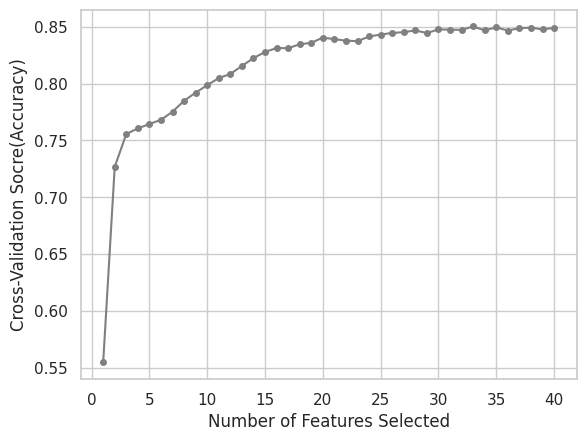

In [28]:
n_features = range(1, len(rfecv.cv_results_['mean_test_score'])+1)
acc = rfecv.cv_results_['mean_test_score']

plt.figure()
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation Socre(Accuracy)")
plt.plot(n_features, acc, marker='o', linestyle='-', markersize=4, color='gray')
plt.show()

## 4. 모델링

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_sm_trans, y_sm, test_size=0.3, random_state=0)

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=1000, random_state=0)
lr_param = {
    'C':[0.001,0.01,0.1,1,10]
}

lr_grid_search = GridSearchCV(estimator=lr, param_grid=lr_param, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train, y_train)

lr_best_model = lr_grid_search.best_estimator_
lr_pred = lr_best_model.predict(X_test)

lr_rep = classification_report(y_test, lr_pred)
print('Best Parameters:', lr_grid_search.best_params_)
print(lr_rep)

Best Parameters: {'C': 10}
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1542
           1       0.83      0.86      0.85      1556

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098



In [31]:
rf = RandomForestClassifier(random_state=0)
rf_param = {
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20,30]
}

rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

rf_best_model = rf_grid_search.best_estimator_
rf_pred = rf_best_model.predict(X_test)
rf_rep = classification_report(y_test, rf_pred)
print('Best Parameters:', rf_grid_search.best_params_)
print(lr_rep)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': 20, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1542
           1       0.83      0.86      0.85      1556

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098



In [32]:
knn = KNeighborsClassifier()
knn_param = {
    'n_neighbors':[3,5,7,9]
}
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
knn_grid_search.fit(X_train, y_train)

knn_best_model = knn_grid_search.best_estimator_
knn_pred = knn_best_model.predict(X_test)
knn_rep = classification_report(y_test, knn_pred)
print('Best Parameters:', knn_grid_search.best_params_)
print(knn_rep)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'n_neighbors': 3}
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1542
           1       0.79      0.91      0.84      1556

    accuracy                           0.83      3098
   macro avg       0.84      0.83      0.83      3098
weighted avg       0.84      0.83      0.83      3098



In [33]:
xgb = XGBClassifier(random_state=0)
xgb_param = {
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.001],
    'n_estimators':[100,200,300]
}
xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

xgb_best_model = xgb_grid_search.best_estimator_
xgb_pred = xgb_best_model.predict(X_test)
xgb_rep = classification_report(y_test, xgb_pred)
print('Best Parameters:', xgb_grid_search.best_params_)
print(xgb_rep)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1542
           1       0.84      0.88      0.86      1556

    accuracy                           0.86      3098
   macro avg       0.86      0.86      0.86      3098
weighted avg       0.86      0.86      0.86      3098



In [34]:
lgbm = LGBMClassifier(verbosity=-1, random_state=0)
lgbm_param = {
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.001],
    'n_estimators':[100,200,300]
}
lgbm_grid_search = GridSearchCV(estimator=lgbm, param_grid=lgbm_param, cv=5, scoring='accuracy', n_jobs=-1)
lgbm_grid_search.fit(X_train, y_train)

lgbm_best_model = lgbm_grid_search.best_estimator_
lgbm_pred = lgbm_best_model.predict(X_test)
lgbm_rep = classification_report(y_test, lgbm_pred)
print('Best Parameters:', lgbm_grid_search.best_params_)
print(lgbm_rep)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1542
           1       0.84      0.87      0.86      1556

    accuracy                           0.85      3098
   macro avg       0.85      0.85      0.85      3098
weighted avg       0.85      0.85      0.85      3098



In [35]:
svc = SVC(random_state=0)
svc_param = {
    'C':[0.1, 1, 10],
    'gamma':[0.1, 1, 10]
}
svc_grid_search = GridSearchCV(estimator=svc, param_grid=svc_param, scoring='accuracy', cv=5, n_jobs=-1)
svc_grid_search.fit(X_train, y_train)

svc_best_model = svc_grid_search.best_estimator_
svc_pred = svc_best_model.predict(X_test)
svc_rep = classification_report(y_test, svc_pred)
print('Best Parameters:', svc_grid_search.best_params_)
print(svc_rep)

Best Parameters: {'C': 1, 'gamma': 0.1}
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1542
           1       0.81      0.88      0.84      1556

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098



## 5. 모델 해석

Feature Importance 확인

In [36]:
xgb_imp = xgb_best_model.feature_importances_
lgbm_imp = lgbm_best_model.feature_importances_
rf_imp = rf_best_model.feature_importances_

feature_names = X_train.columns

df_imp = pd.DataFrame({
    'Feature':feature_names,
    'XGBoost Importance':xgb_imp,
    'LightGBM Importance':lgbm_imp,
    'Random Forest Importance':rf_imp
})

df_imp = df_imp.sort_values(by=['XGBoost Importance'], ascending=False)

In [37]:
df_imp

Feature  XGBoost Importance  \
26                  Contract_Month-to-month            0.397538   
11              InternetService_Fiber optic            0.136282   
27                        Contract_One year            0.053348   
28                        Contract_Two year            0.049198   
13       OnlineSecurity_No internet service            0.048616   
30    PaymentMethod_Credit card (automatic)            0.023865   
32               PaymentMethod_Mailed check            0.021756   
15                          OnlineBackup_No            0.019024   
14                       OnlineSecurity_Yes            0.016601   
31           PaymentMethod_Electronic check            0.016441   
12                        OnlineSecurity_No            0.016138   
10                      InternetService_DSL            0.015901   
21                          TechSupport_Yes            0.015793   
3                                Dependents            0.013837   
8                          MultipleLines_No            0.013775   
29  PaymentMethod_Bank transfer (automatic)            0.012862   
4                                    tenure            0.012821   
20                           TechSupport_No            0.012599   
25                      StreamingMovies_Yes            0.011815   
23                          StreamingTV_Yes            0.011305   
22                           StreamingTV_No            0.011254   
24                       StreamingMovies_No            0.008305   
16                         OnlineBackup_Yes            0.007745   
19                     DeviceProtection_Yes            0.007549   
6                            MonthlyCharges            0.007387   
9                         MultipleLines_Yes            0.007120   
7                              TotalCharges            0.006213   
5                          PaperlessBilling            0.005333   
1                             SeniorCitizen            0.005264   
0                                    gender            0.005065   
2                                   Partner            0.004674   
17                      DeviceProtection_No            0.004578   
18     DeviceProtection_No internet service            0.000000   

    LightGBM Importance  Random Forest Importance  
26                   63                  0.075698  
11                   46                  0.030001  
27                   57                  0.023958  
28                   64                  0.039669  
13                   25                  0.006570  
30                   77                  0.014789  
32                   73                  0.013051  
15                   28                  0.017608  
14                   48                  0.020741  
31                   84                  0.023075  
12                   56                  0.034038  
10                   38                  0.013803  
21                   61                  0.016174  
3                    57                  0.020525  
8                    72                  0.015797  
29                   66                  0.014040  
4                   766                  0.147649  
20                   36                  0.025017  
25                   48                  0.011148  
23                   26                  0.010064  
22                   44                  0.012084  
24                   39                  0.011496  
16                   44                  0.013510  
19                   24                  0.011474  
6                   866                  0.128111  
9                    53                  0.012343  
7                   617                  0.135734  
5                    82                  0.020516  
1                    53                  0.014302  
0                   108                  0.023184  
2                    42                  0.020765  
17                   26                  0.013420  
18                    0                  

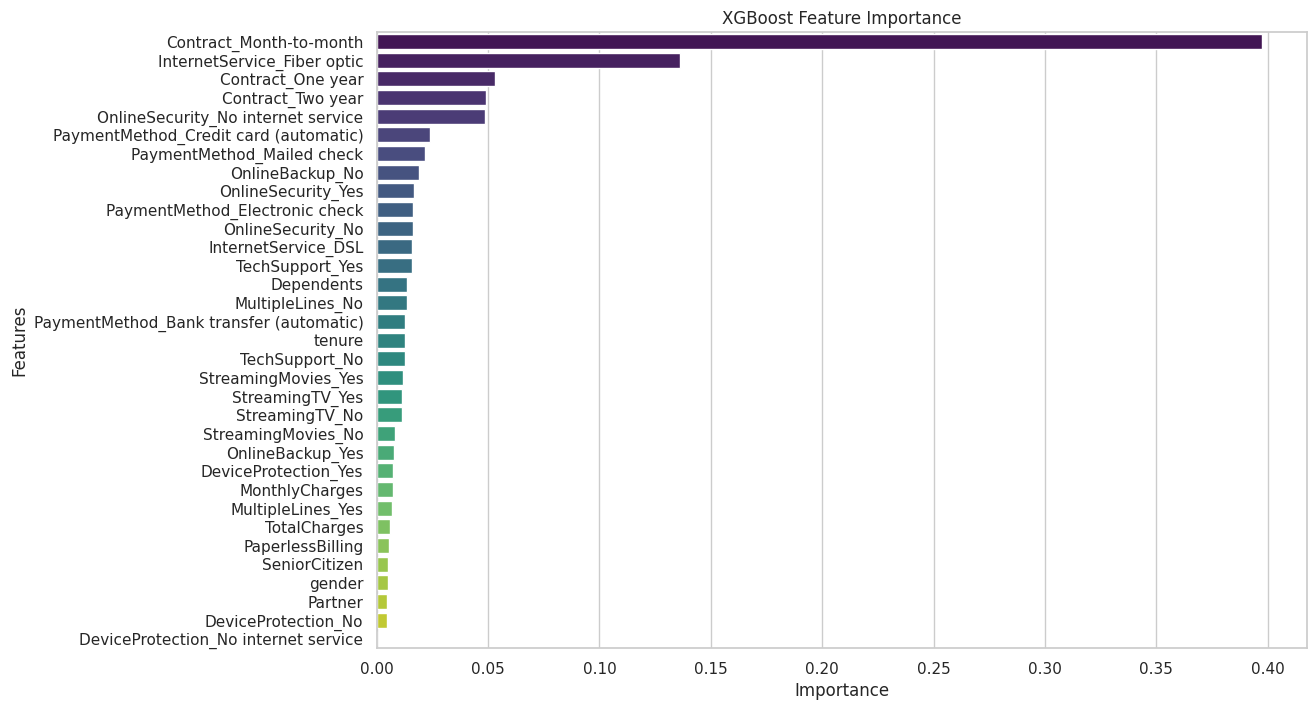

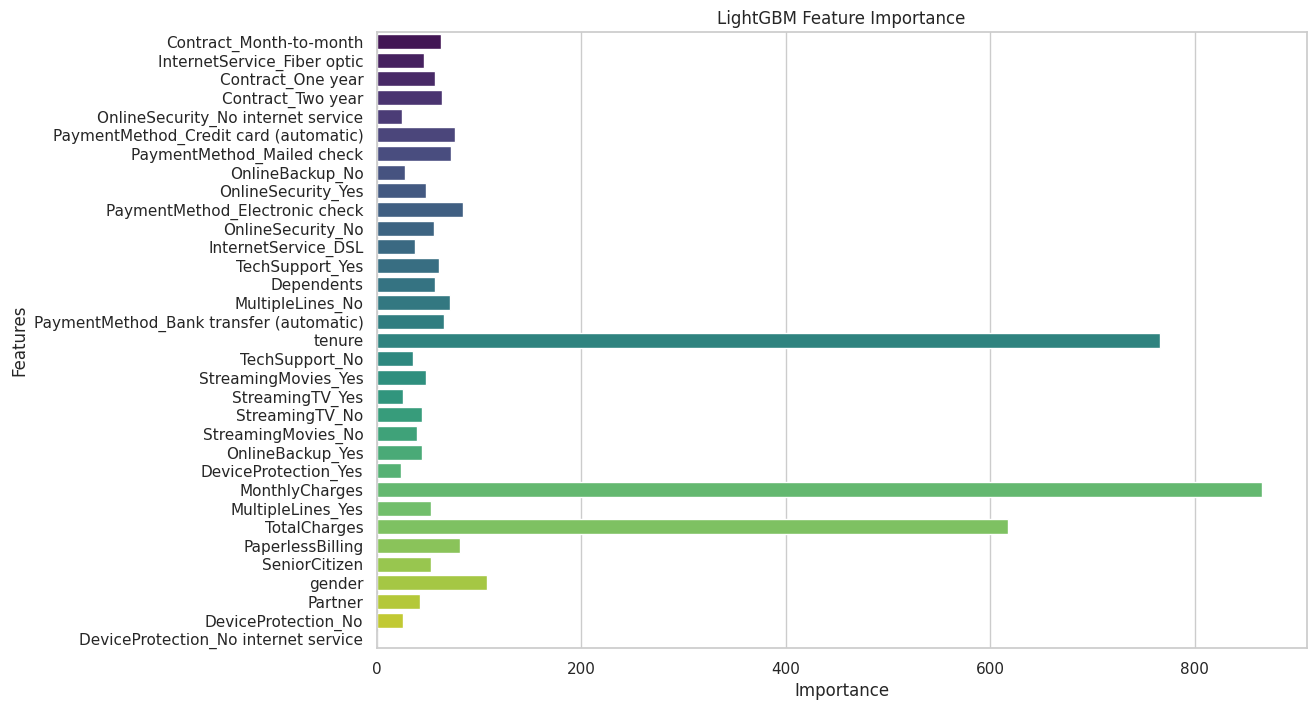

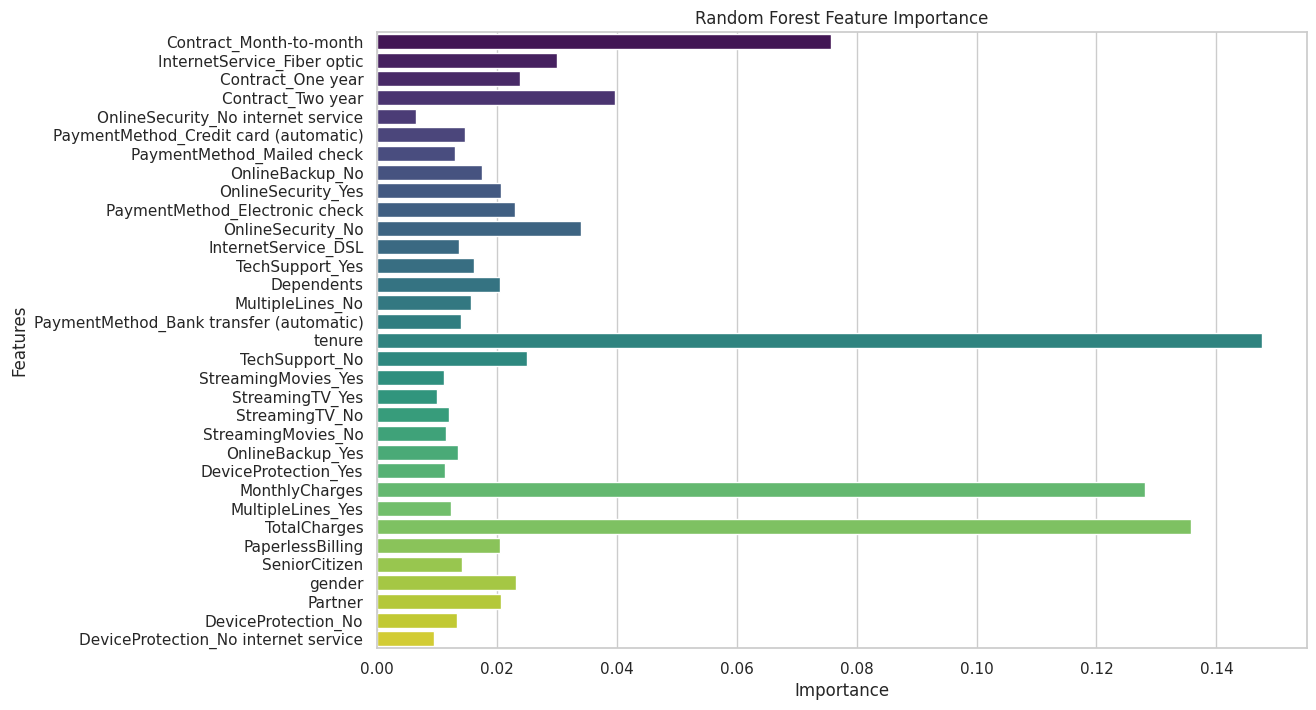

In [38]:
plt.figure(figsize=(12, 8))
sns.barplot(x='XGBoost Importance', y='Feature', data=df_imp, palette='viridis')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='LightGBM Importance', y='Feature', data=df_imp, palette='viridis')
plt.title('LightGBM Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Random Forest Importance', y='Feature', data=df_imp, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

XAI

In [39]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.3 MB/s eta 0:00:00


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


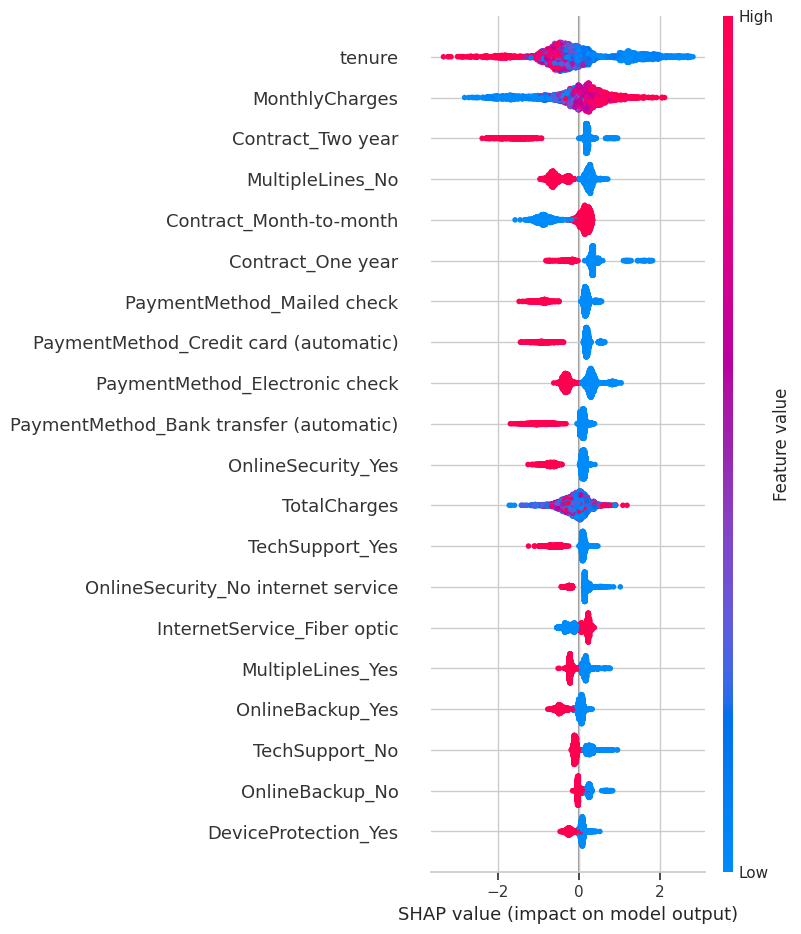

In [40]:
import shap

xgb_explain = shap.Explainer(xgb_best_model)
shap_values = xgb_explain.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

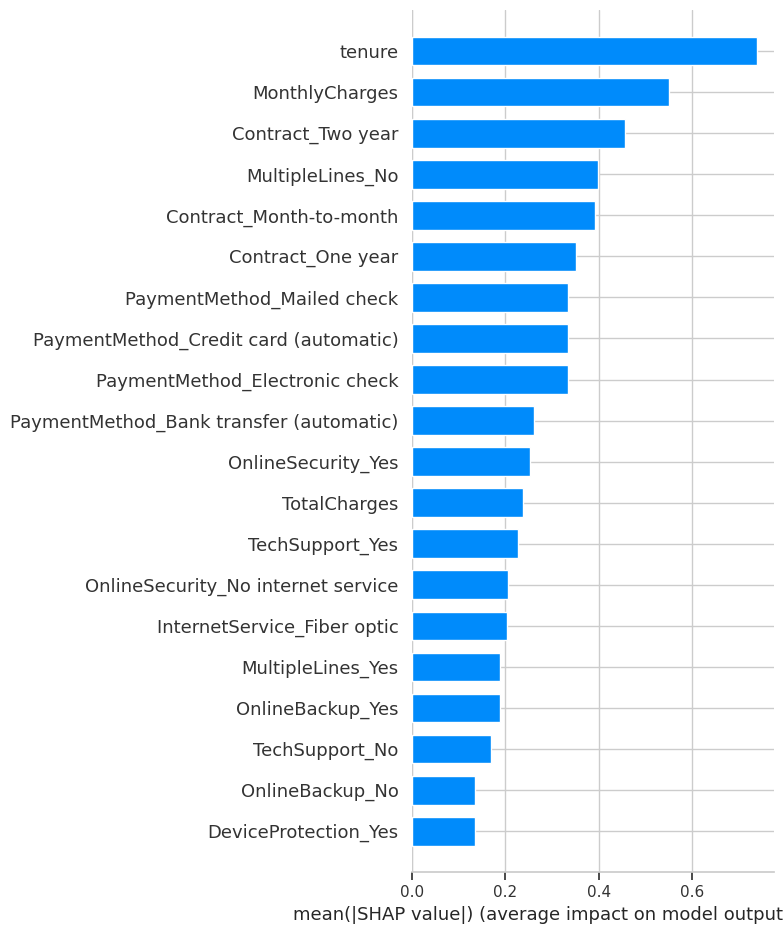

In [52]:
shap.summary_plot(shap_values, X_test, plot_type = "bar")

In [50]:
shap.initjs()
shap.force_plot(xgb_explain.expected_value, shap_values, X_test)

shap.plots.force is slow for many thousands of rows, try subsampling your data.
